<a href="https://colab.research.google.com/github/cras-lab/Finance1/blob/main/Correalation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요한 모듈과 yfinance를 로드한다.

In [15]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

주가를 불러오는 기간과 수익율을 측정할 기간을 설정한다.

In [145]:
start_date ='2022-01-01'
end_date = '2022-12-31'
time_gap = 20 # 20영업일(=한달) 수익률 사이의 상관관계를 측정해 본다.

공분산상관관계를 알고 싶은 주식 종목을 나열한다. yfinance의 주식종목 코드를 검색해서 나열하면 된다.

In [165]:
portfolio = ['005930.KS', '066570.KS', '003490.KS', '010950.KS', '051910.KS', '330590.KS', '000100.KS', '000087.KS', '000070.KS', '000150.KS', '000270.KS' , '057050.KS' ]

name = ['Samsung', 'LGE', 'KAL', 'G-Cross', 'S-Oil', 'LG-Chem', 'Yoohan', 'HITE', 'Meritz', 'Doosan' , "KIA", "HD-HS"]

데이터프레임의 딕셔너리를 구성하여, 종목별 데이터프레임을 저장한다.

In [166]:
dfs = {}  # Dictionary of dataframes

최대, 최소 상관관계를 찾기 위해 초기값을 설정한다.

In [167]:
max_corr = -1
min_corr = 1

루프를 돌며, portfolio라는 리스트에 들어 있는 모든 종목에 대해<BR> 
1) yfinance에서 주가를 읽어 온다. <BR>
2) 지정한 시간 사이의 변동량(수익률)의 로그 수익률을 계산한다.<BR>
3) 혹시 비어 있는 값은 0으로 채운다.<BR>

In [168]:
for i in range( len (portfolio)):  
  dfs[i] = yf.download( portfolio[i], start=start_date, end=end_date, progress = False ) # 주가 읽어오기
  dfs[i].rename(columns={'Adj Close':'adj_close'}, inplace=True ) 
  dfs[i]['log_rtn'] = np.log( dfs[i].adj_close / dfs[i].adj_close.shift(time_gap)).fillna(0) # 로그 수익률 계산하기

루프를 돌며 모든 쌍에 대해, 상관관계를 계산한다.

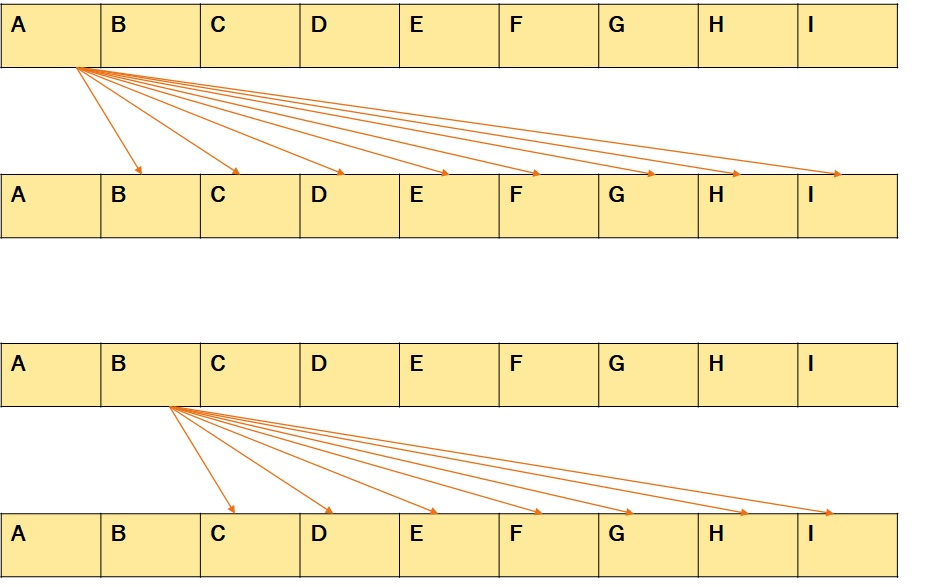

In [169]:
for i in range(len(portfolio)):
  for j in range( i+1, len(portfolio)):
    corr = np.corrcoef( dfs[i]['log_rtn'], dfs[j]['log_rtn'])[0][1]
    if( max_corr < corr ):  # 최대값 갱신
      max_corr = corr
      max_index = [i, j]
    if( min_corr > corr ):  # 최소값 갱신
      min_corr = corr
      min_index = [i,j]

최대값과 최소값을 출력한다.

In [ ]:
print("closest pair=",name[max_index[0]],name[max_index[1]],max_corr)
print("farthest pair=",name[min_index[0]],name[min_index[1]],min_corr)

In [ ]:
plt.subplot(2,1,1)
plt.plot( dfs[max_index[0]]['log_rtn'], label= name[max_index[0]] )
plt.plot(dfs[max_index[1]]['log_rtn'] , label= name[max_index[1]] )
plt.legend( loc="upper left")

plt.subplot(2,1,2)
plt.plot( dfs[min_index[0]]['log_rtn'] , label= name[min_index[0]])
plt.plot( dfs[min_index[1]]['log_rtn'] , label= name[min_index[1]])
plt.legend( loc="lower left")